In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()

In [ ]:
import pandas as pd
dataset = pd.read_csv("data.csv")
dataset.head()

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence,swungAt
0,1,2021-10-17,14:00:35.17,1,1,"Molsky, Tommy",1.000113e+09,Right,PSU_PRA,"Gerlott, Billy",...,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN,0
1,2,2021-10-17,14:00:49.80,1,2,"Molsky, Tommy",1.000113e+09,Right,PSU_PRA,"Gerlott, Billy",...,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN,0
2,3,2021-10-17,14:01:04.79,1,3,"Molsky, Tommy",1.000113e+09,Right,PSU_PRA,"Gerlott, Billy",...,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN,1
3,4,2021-10-17,14:01:22.27,1,4,"Molsky, Tommy",1.000113e+09,Right,PSU_PRA,"Gerlott, Billy",...,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN,1
4,5,2021-10-17,14:01:55.20,2,1,"Molsky, Tommy",1.000113e+09,Right,PSU_PRA,"Burke, Noah",...,NaN,High,Medium,Medium,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
X = dataset[['PitchNo', 'RelSpeed', 'SpinRate', 'InducedVertBreak', 'HorzBreak',
             'PitcherThrows', 'BatterSide', 'TaggedPitchType', 'PlateLocSide', 'PlateLocHeight',
             'ZoneSpeed', 'Balls', 'Strikes', 'swungAt']]

In [ ]:
len(X)

3199

#Feature Engineering

In [ ]:
prev_pitch_list = []
for i in range(len(X)):
    
    if X['PitchNo'][i] == 1:
        previous_pitch = 'none'
    
    elif X['PitchNo'][i]!= 1:
        previous_pitch = X['TaggedPitchType'][i-1]
    
    prev_pitch_list.append(previous_pitch)

In [ ]:
X['PreviousPitchType'] = prev_pitch_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X.isnull().sum()

PitchNo              0
RelSpeed             2
SpinRate             7
InducedVertBreak     2
HorzBreak            2
PitcherThrows        0
BatterSide           0
TaggedPitchType      0
PlateLocSide         2
PlateLocHeight       2
ZoneSpeed            2
Balls                0
Strikes              0
swungAt              0
PreviousPitchType    0
dtype: int64

In [ ]:
X = X.dropna()
X.isnull().sum()

PitchNo              0
RelSpeed             0
SpinRate             0
InducedVertBreak     0
HorzBreak            0
PitcherThrows        0
BatterSide           0
TaggedPitchType      0
PlateLocSide         0
PlateLocHeight       0
ZoneSpeed            0
Balls                0
Strikes              0
swungAt              0
PreviousPitchType    0
dtype: int64

In [ ]:
len(X)

3192

In [ ]:
swing = X[X.swungAt == 1]

In [ ]:
len(swing)

1294

In [ ]:
noswing = X[X.swungAt == 0]

In [ ]:
len(noswing)

1898

In [ ]:
y=X['swungAt']

In [ ]:
X["RelSpeed_vs_ZoneSpeed"] = X["RelSpeed"] - X["ZoneSpeed"]

In [ ]:
meanSpeed = X['RelSpeed'].mean()

In [ ]:
X["Difference_from_avg_speed"] = X["RelSpeed"] - meanSpeed

In [ ]:
meanLocSide = X['PlateLocSide'].mean()
meanLocHeight = X['PlateLocHeight'].mean()

In [ ]:
X["SideExtremity"] = X["PlateLocSide"] - meanLocSide
X["HeightExtremity"] = X["PlateLocHeight"] - meanLocHeight


In [ ]:
X['Extreme'] = (X["Difference_from_avg_speed"] + X['SideExtremity'] + X['HeightExtremity'])/(meanSpeed + meanLocSide + meanLocHeight)

In [ ]:
# HorzBreak
meanHorzBreak = X['HorzBreak'].mean()
X['HorzBreakExtremity'] = X['HorzBreak'] - meanHorzBreak

In [ ]:
# VertBreak
meanVertBreak = X['InducedVertBreak'].mean()
X['VertBreakExtremity'] = X['InducedVertBreak'] - meanHorzBreak

In [ ]:
# SpinRate
meanSpinRate = X['SpinRate'].mean()
X['SpinRateExtremity'] = X['SpinRate'] - meanSpinRate

In [ ]:
X['PitchMovement'] = (X["SpinRateExtremity"] + X['HorzBreakExtremity'] + X['VertBreakExtremity'])/(meanHorzBreak + meanVertBreak + meanSpinRate) 

In [ ]:
X.head()

,PitchNo,RelSpeed,SpinRate,InducedVertBreak,HorzBreak,PitcherThrows,BatterSide,TaggedPitchType,PlateLocSide,PlateLocHeight,...,PreviousPitchType,RelSpeed_vs_ZoneSpeed,Difference_from_avg_speed,SideExtremity,HeightExtremity,Extreme,HorzBreakExtremity,VertBreakExtremity,SpinRateExtremity,PitchMovement
0,1,91.31813,2115.387638,17.54001,14.25583,Right,Right,Fastball,2.20333,2.98657,...,none,8.07295,6.649483,2.160573,0.724514,0.109626,11.629056,14.913236,-23.313020,0.001501
1,2,92.25342,1671.583699,12.53052,10.74146,Right,Right,Fastball,0.41052,3.44076,...,Fastball,7.37993,7.584773,0.367763,1.178704,0.104989,8.114686,9.903746,-467.116959,-0.208711
2,3,81.35562,2236.681310,-2.12973,-7.99288,Right,Right,Slider,-0.34575,2.44097,...,Fastball,5.69224,-3.313027,-0.388507,0.178914,-0.040502,-10.619654,-4.756504,97.980652,0.038389
3,4,81.62514,2569.976060,3.08008,-10.24032,Right,Right,Slider,-1.91768,0.87508,...,Slider,5.30141,-3.043507,-1.960437,-1.386976,-0.073481,-12.867094,0.453306,431.275402,0.194659
4,5,93.31665,1918.602426,13.62296,12.53012,Right,Left,Fastball,-0.10321,1.32272,...,Slider,7.03196,8.648003,-0.145967,-0.939336,0.086954,9.903346,10.996186,-220.098232,-0.092574


In [ ]:
# Without faster slower higher lower
pd.get_dummies(X, columns=['TaggedPitchType', 'PitcherThrows', 'BatterSide']).head()
X=pd.get_dummies(X, columns=['TaggedPitchType', 'PitcherThrows', 'BatterSide', 'PreviousPitchType'])

In [ ]:
X

,PitchNo,RelSpeed,SpinRate,InducedVertBreak,HorzBreak,PlateLocSide,PlateLocHeight,ZoneSpeed,Balls,Strikes,...,BatterSide_Right,BatterSide_Undefined,PreviousPitchType_ChangeUp,PreviousPitchType_Curveball,PreviousPitchType_Cutter,PreviousPitchType_Fastball,PreviousPitchType_Sinker,PreviousPitchType_Slider,PreviousPitchType_Splitter,PreviousPitchType_none
0,1,91.31813,2115.387638,17.54001,14.25583,2.20333,2.98657,83.24518,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,92.25342,1671.583699,12.53052,10.74146,0.41052,3.44076,84.87349,1,0,...,1,0,0,0,0,1,0,0,0,0
2,3,81.35562,2236.681310,-2.12973,-7.99288,-0.34575,2.44097,75.66338,1,1,...,1,0,0,0,0,1,0,0,0,0
3,4,81.62514,2569.976060,3.08008,-10.24032,-1.91768,0.87508,76.32373,1,2,...,1,0,0,0,0,0,0,1,0,0
4,5,93.31665,1918.602426,13.62296,12.53012,-0.10321,1.32272,86.28469,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,199,83.22079,2001.539498,17.44690,8.37937,-0.30213,1.92353,76.23039,3,1,...,1,0,0,0,0,1,0,0,0,0
3195,200,82.15128,1973.073429,18.24103,13.21564,0.73147,3.42959,75.51590,0,0,...,0,0,0,0,0,1,0,0,0,0
3196,201,83.93347,2049.658488,20.35985,11.47757,-0.53054,1.48254,76.87528,0,1,...,0,0,0,0,0,1,0,0,0,0
3197,202,80.90595,2057.596755,17.95107,13.06501,-0.86395,0.62801,74.58459,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df = X

In [ ]:
df.head()

,PitchNo,RelSpeed,SpinRate,InducedVertBreak,HorzBreak,PlateLocSide,PlateLocHeight,ZoneSpeed,Balls,Strikes,...,BatterSide_Right,BatterSide_Undefined,PreviousPitchType_ChangeUp,PreviousPitchType_Curveball,PreviousPitchType_Cutter,PreviousPitchType_Fastball,PreviousPitchType_Sinker,PreviousPitchType_Slider,PreviousPitchType_Splitter,PreviousPitchType_none
0,1,91.31813,2115.387638,17.54001,14.25583,2.20333,2.98657,83.24518,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,92.25342,1671.583699,12.53052,10.74146,0.41052,3.44076,84.87349,1,0,...,1,0,0,0,0,1,0,0,0,0
2,3,81.35562,2236.681310,-2.12973,-7.99288,-0.34575,2.44097,75.66338,1,1,...,1,0,0,0,0,1,0,0,0,0
3,4,81.62514,2569.976060,3.08008,-10.24032,-1.91768,0.87508,76.32373,1,2,...,1,0,0,0,0,0,0,1,0,0
4,5,93.31665,1918.602426,13.62296,12.53012,-0.10321,1.32272,86.28469,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X.pop("swungAt")

0       0
1       0
2       1
3       1
4       0
       ..
3194    1
3195    0
3196    1
3197    0
3198    1
Name: swungAt, Length: 3192, dtype: int64

# Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:

from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(n_estimators=150)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7652582159624414


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[320,  76],
       [ 74, 169]])

<function matplotlib.pyplot.show>

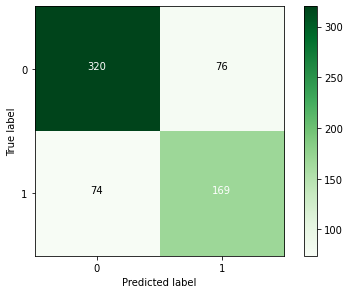

In [ ]:
from itertools import combinations, product
cm = confusion_matrix(y_test, y_pred)
cmap = plt.cm.Greens
classes = [0,1]
thresh = cm.max() / 2.
fmt = 'd'

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.show

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(' Important Features')
  plt.xlabel('Feature Importance')
  plt.ylabel('Feature Names')

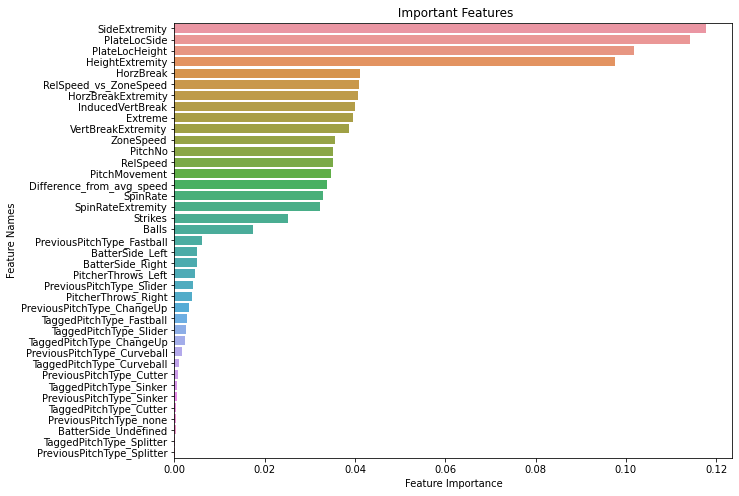

In [ ]:
plot_feature_importance(clf.feature_importances_, df.columns,'RANDOM FOREST')

# XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1500, shuffle=True )

In [ ]:
for col in df.columns:
    print(col)

PitchNo
RelSpeed
SpinRate
InducedVertBreak
HorzBreak
PlateLocSide
PlateLocHeight
ZoneSpeed
Balls
Strikes
swungAt
RelSpeed_vs_ZoneSpeed
Difference_from_avg_speed
SideExtremity
HeightExtremity
Extreme
HorzBreakExtremity
VertBreakExtremity
SpinRateExtremity
PitchMovement
TaggedPitchType_ChangeUp
TaggedPitchType_Curveball
TaggedPitchType_Cutter
TaggedPitchType_Fastball
TaggedPitchType_Sinker
TaggedPitchType_Slider
TaggedPitchType_Splitter
PitcherThrows_Left
PitcherThrows_Right
BatterSide_Left
BatterSide_Right
BatterSide_Undefined
PreviousPitchType_ChangeUp
PreviousPitchType_Curveball
PreviousPitchType_Cutter
PreviousPitchType_Fastball
PreviousPitchType_Sinker
PreviousPitchType_Slider
PreviousPitchType_Splitter
PreviousPitchType_none


In [ ]:
target = 'swungAt'
predictors = ['RelSpeed',
'SpinRate',
'InducedVertBreak',
'HorzBreak',
'PlateLocSide',
'PlateLocHeight',
'ZoneSpeed', 'RelSpeed_vs_ZoneSpeed',
'Difference_from_avg_speed',
'SideExtremity',
'HeightExtremity',
'TaggedPitchType_ChangeUp',
'TaggedPitchType_Curveball',
'TaggedPitchType_Cutter',
'TaggedPitchType_Fastball',
'TaggedPitchType_Sinker',
'TaggedPitchType_Slider',
'TaggedPitchType_Splitter',
'PitcherThrows_Left',
'PitcherThrows_Right',
'BatterSide_Left',
'BatterSide_Right',
'BatterSide_Undefined',
'Extreme', 'HorzBreakExtremity',
'VertBreakExtremity',
'SpinRateExtremity',
'PitchMovement', 'Balls',
'Strikes', 'PreviousPitchType_ChangeUp',
'PreviousPitchType_Curveball',
'PreviousPitchType_Cutter',
'PreviousPitchType_Fastball',
'PreviousPitchType_Sinker',
'PreviousPitchType_Slider',
'PreviousPitchType_Splitter',
'PreviousPitchType_none']

In [ ]:
train_df_bkp = train_df.copy()
test_df_bkp = test_df.copy()

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 1500

In [ ]:
model = xgb.train(params, 
                dtrain, 
                1000, 
                watchlist, 
                early_stopping_rounds=50, 
                maximize=True, 
                verbose_eval=50)

[0]	train-auc:0.705172	test-auc:0.675905
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[50]	train-auc:0.838833	test-auc:0.805889
[100]	train-auc:0.857025	test-auc:0.825222
[150]	train-auc:0.867037	test-auc:0.836425
[200]	train-auc:0.873818	test-auc:0.843259
[250]	train-auc:0.880939	test-auc:0.84896
[300]	train-auc:0.885616	test-auc:0.851421
[350]	train-auc:0.89152	test-auc:0.85338
[400]	train-auc:0.897028	test-auc:0.855307
[450]	train-auc:0.901411	test-auc:0.856087
[500]	train-auc:0.905902	test-auc:0.858199
[550]	train-auc:0.909652	test-auc:0.85782
Stopping. Best iteration:
[514]	train-auc:0.907162	test-auc:0.858681



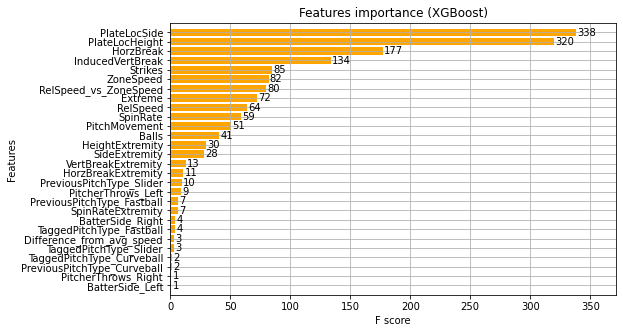

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="orange") 
plt.show()

In [ ]:
# Feature Selection
new_predictors = ['HorzBreak',
'PlateLocSide',
'PlateLocHeight', 'SpinRate',
'InducedVertBreak', 'RelSpeed_vs_ZoneSpeed', 'RelSpeed',
'ZoneSpeed', 'SideExtremity',
'HeightExtremity', 'Extreme', 'Balls', 'Strikes', 'HorzBreakExtremity', 'PitchMovement',
'VertBreakExtremity']

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(train_df[new_predictors], train_df[target].values)
dtest = xgb.DMatrix(test_df[new_predictors], test_df[target].values)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 1500

In [ ]:
model = xgb.train(params, 
                dtrain, 
                1000, 
                watchlist, 
                early_stopping_rounds=50, 
                maximize=True, 
                verbose_eval=50)

[0]	train-auc:0.705172	test-auc:0.675905
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[50]	train-auc:0.837101	test-auc:0.806407
[100]	train-auc:0.857882	test-auc:0.825176
[150]	train-auc:0.866685	test-auc:0.836461
[200]	train-auc:0.87291	test-auc:0.842367
[250]	train-auc:0.88002	test-auc:0.848642
[300]	train-auc:0.885081	test-auc:0.852047
[350]	train-auc:0.89117	test-auc:0.853821
[400]	train-auc:0.896523	test-auc:0.85581
[450]	train-auc:0.900651	test-auc:0.856897
[500]	train-auc:0.905496	test-auc:0.85904
[550]	train-auc:0.909263	test-auc:0.859706
[600]	train-auc:0.912697	test-auc:0.86026
[650]	train-auc:0.916281	test-auc:0.860363
Stopping. Best iteration:
[628]	train-auc:0.914668	test-auc:0.860783



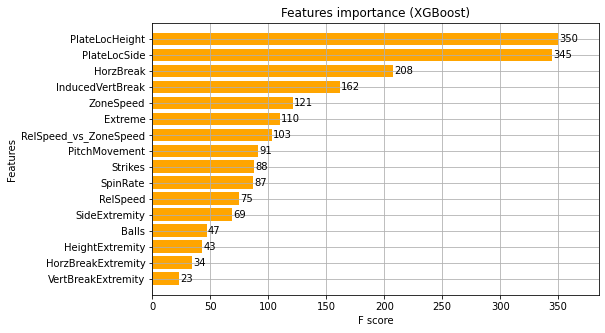

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="orange") 
plt.show()

In [ ]:
y=X['swungAt'].copy()
#X=X.copy().drop('swungAt', axis=1)
X=X[['HorzBreak',
'PlateLocSide',
'PlateLocHeight', 'SpinRate',
'InducedVertBreak', 'RelSpeed_vs_ZoneSpeed', 'RelSpeed',
'ZoneSpeed', 'SideExtremity',
'HeightExtremity', 'Extreme', 'Balls', 'Strikes', 'HorzBreakExtremity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=895)

In [ ]:
xgb = XGBClassifier(n_jobs = -1)
xgb

XGBClassifier(n_jobs=-1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
xgb.fit(X_train, y_train)
prediction = xgb.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100,3)))
print("Recall: {}%".format(round(recall_score(y_test, prediction) * 100,3)))
print("Precision: {}%".format(round(precision_score(y_test, prediction) * 100,3)))
print("f1: {}%".format(round(accuracy_score(y_test, prediction) * 100,3)))

Accuracy: 77.135%
Recall: 75.792%
Precision: 71.429%
f1: 77.135%


<function matplotlib.pyplot.show>

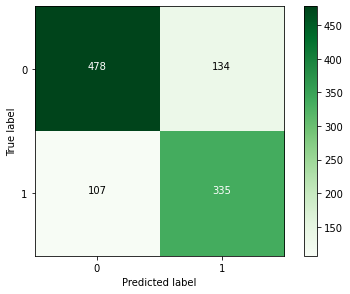

In [ ]:
from itertools import combinations, product
cm = confusion_matrix(y_test, prediction)
cmap = plt.cm.Greens
classes = [0,1]
thresh = cm.max() / 2.
fmt = 'd'

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.show